In [8]:
import pandas as pd
import numpy as np

pd.options.display.max_colwidth = 200

corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


In [9]:
import nltk 
import re
nltk.download('stopwords')
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words('english')

def normalize_corpus(doc):
  doc = re.sub(r'[^a-zA-Z0-9/s]',' ',doc, re.I | re.A)
  doc = doc.lower()
  doc = doc.strip()
  tokens = nltk.word_tokenize(doc)
  filtered_toks = [token for token in tokens if token not in stop_words]
  doc = " ".join(filtered_toks)
  return doc


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
normalize_corpus("Hi how are you doing today!!!!!")

'hi today'

In [11]:
normalize_corpus = np.vectorize(normalize_corpus)

norm_data = normalize_corpus(corpus)
norm_data

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'king breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U50')

In [5]:
#Word2Vec - Continuous dense vector representations for each word 
#dense vectors - derive contextual and semantic similarity based information
#Models take in massive corpus, A vocab, dense wordembeddings and their associations

In [6]:
      [1    2 3 4 5 6 7 8 ....... 300]
Movie  freq 

SyntaxError: ignored

In [12]:
from gensim.models import word2vec

tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_data]

#!!!!!!!!!!
#Skip-Gram: tries to predict the context via estimating the neighbours - Understands the neighbours or predicts the neighbours
#CBOW - Straighforward word - prediction based on neighbours  


#Setting values of params very important!!!
feature_size = 30 #word Vector dimensionality 
window_size = 20 #context window size
min_word_count= 1 #This a way to remove infrequent words
sg = 1 #1-CBOW

w2v = word2vec.Word2Vec(tokenized_corpus, size= feature_size, window = window_size,min_count = min_word_count, sg = sg)
w2v

In [13]:
w2v['dog']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.00271793, -0.0122023 ,  0.01405402, -0.00527638, -0.0136785 ,
        0.01332208, -0.00951927, -0.00306002, -0.00720475,  0.0154483 ,
        0.01449264, -0.01069017,  0.00676908, -0.00993239,  0.00221534,
       -0.01353741,  0.01403666,  0.00012394, -0.00847595,  0.01355793,
       -0.0058107 ,  0.00638192,  0.00610305, -0.01071622,  0.00277227,
       -0.00291031,  0.00498171, -0.00473141,  0.00398886, -0.00630607],
      dtype=float32)

In [ ]:
t-SNE - T-Distributed Stochastic Neighbour embedding.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

#Visualize the Embeddings
from sklearn.manifold import TSNE

In [13]:
words = w2v.wv.index2word
wvs = w2v.wv[words]

tsne = TSNE(n_components = 2,n_iter = 5000, random_state = 42, perplexity=5)
np.set_printoptions(suppress = True)
T = tsne.fit_transform(wvs)
labels = words

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
plt.figure(figsize = (12,6))
plt.scatter(T[:,0],T[:,1], c= 'orange',edgecolors = 'r')
for label,x,y in zip(labels, T[:,0],T[:,1]):
  plt.annotate(label, xy=(x+1,y+1), xytext = (0,0), textcoords = 'offset points')

In [ ]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2)
results = pca.fit_transform(wvs)
plt.figure(figsize = (12,6))
plt.scatter(results[:,0],results[:,1])
for label,x,y in zip(labels, results[:,0],results[:,1]):
  plt.annotate(label, xy=(x+1,y+1), xytext = (0,0), textcoords = 'offset points')
plt.show()

In [1]:
#Pretrained embeddings - Wikidata 
from gensim.models import KeyedVectors
filename = "drive/MyDrive/GoogleNews-vectors-negative300.bin.gz"
model = KeyedVectors.load_word2vec_format(filename, binary = True)

In [ ]:
model['dog']

In [2]:
result = model.most_similar(positive = ['woman','king'], negative = ['man'],topn=1)
print(result)

[('queen', 0.7118192911148071)]


In [ ]:
#Cosine Similary - Compare the similarity between two vectors 

In [ ]:
#(King - man) + woman = ?

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity 

vec_df= pd.DataFrame(wvs, index = words)
similarity_matrix = cosine_similarity(vec_df)

similarity_df = pd.DataFrame(similarity_matrix, index = words, columns = words)
similarity_df

In [16]:
similarity_df

,sky,blue,beautiful,quick,brown,fox,lazy,dog,love,sausages,ham,bacon,eggs,jumps,king,breakfast,toast,beans,green,today
sky,1.000000,0.172967,-0.237806,-0.545809,-0.044811,0.105792,-0.212688,0.227601,-0.063178,0.238111,0.057683,-0.129272,-0.209002,-0.069799,-0.172450,-0.108620,-0.222268,-0.034565,0.340288,-0.007004
blue,0.172967,1.000000,0.149438,0.128687,-0.180209,-0.147679,0.019689,0.614073,-0.472306,-0.068681,0.110224,0.262081,-0.098872,-0.026826,-0.045835,-0.178362,-0.246632,0.024639,0.135450,0.093982
beautiful,-0.237806,0.149438,1.000000,0.041486,0.034886,0.029363,0.210818,0.224398,0.015364,-0.378716,-0.241996,0.334161,0.107342,-0.095755,-0.343228,0.083692,0.284470,-0.113547,0.076865,0.036622
quick,-0.545809,0.128687,0.041486,1.000000,0.121551,-0.123950,0.144965,0.054111,0.010493,0.055074,0.107743,0.259632,-0.064145,0.247244,0.119955,0.365653,0.083007,0.193296,-0.183908,0.069221
brown,-0.044811,-0.180209,0.034886,0.121551,1.000000,0.234290,-0.018825,-0.182190,-0.077648,-0.073668,0.112060,-0.171049,-0.368494,-0.006957,0.145890,0.074840,-0.016878,0.053339,-0.202803,0.195176
fox,0.105792,-0.147679,0.029363,-0.123950,0.234290,1.000000,0.261326,-0.091097,0.086774,0.338317,-0.129150,-0.044786,-0.204974,0.138525,-0.440282,-0.152286,0.156927,0.106286,0.194533,0.294678
lazy,-0.212688,0.019689,0.210818,0.144965,-0.018825,0.261326,1.000000,0.124374,0.012416,-0.172673,0.083384,0.200271,-0.113909,0.282032,0.085693,0.140864,0.268947,0.076797,-0.032118,-0.037151
dog,0.227601,0.614073,0.224398,0.054111,-0.182190,-0.091097,0.124374,1.000000,0.038511,-0.078520,0.103818,0.135426,-0.157280,-0.118506,0.127868,-0.161929,0.004262,-0.107176,0.371209,0.134873
love,-0.063178,-0.472306,0.015364,0.010493,-0.077648,0.086774,0.012416,0.038511,1.000000,0.052693,-0.091495,-0.310212,0.026745,-0.043673,0.100944,-0.137835,0.073182,-0.087453,0.185184,-0.240575
sausages,0.238111,-0.068681,-0.378716,0.055074,-0.073668,0.338317,-0.172673,-0.078520,0.052693,1.000000,0.223719,-0.120854,-0.067335,-0.030251,-0.122525,0.057385,-0.178929,0.078294,0.178567,0.257997


In [ ]:
#Glove - Stanford NLP 
#just like word2vec - Glove are also wordvectors
#Aggregated value of w2w - co-occerence matrices, Word context, word-Feature and Feature context

In [17]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 5.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [20]:
tokenized_corpus

[['sky', 'blue', 'beautiful'],
 ['love', 'blue', 'beautiful', 'sky'],
 ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog'],
 ['king', 'breakfast', 'sausages', 'ham', 'bacon', 'eggs', 'toast', 'beans'],
 ['love', 'green', 'eggs', 'ham', 'sausages', 'bacon'],
 ['brown', 'fox', 'quick', 'blue', 'dog', 'lazy'],
 ['sky', 'blue', 'sky', 'beautiful', 'today'],
 ['dog', 'lazy', 'brown', 'fox', 'quick']]

In [15]:
import spacy 
nlp = spacy.load('en_core_web_sm')
unique_words = list(set([word for sublist in tokenized_corpus for word in sublist]))

In [16]:
unique_words

['jumps',
 'eggs',
 'sky',
 'king',
 'ham',
 'dog',
 'beans',
 'breakfast',
 'lazy',
 'green',
 'sausages',
 'fox',
 'blue',
 'toast',
 'today',
 'brown',
 'beautiful',
 'bacon',
 'love',
 'quick']

In [17]:
word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
vec_df = pd.DataFrame(word_glove_vectors, index = unique_words)
vec_df

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
jumps,1.582098,-3.639481,0.232629,0.684218,3.197534,3.035496,3.587500,-1.766943,0.916759,1.005993,...,-1.716197,0.630157,-0.235085,-1.175115,-1.844851,1.658656,2.239774,0.502037,-2.653093,1.894150
eggs,1.392701,-2.333002,0.117410,0.905006,4.596086,1.232233,1.379627,0.334007,2.872356,0.657978,...,-0.984156,-0.110476,-0.390287,-1.847488,0.359684,-1.283720,2.385407,2.695145,-0.928174,-0.336361
sky,0.208949,1.281923,-0.030207,-0.359930,2.630601,1.097632,1.776505,0.944719,1.803950,5.289375,...,-0.987015,0.516423,-1.144101,-2.573901,-0.657242,2.561278,-3.157792,2.699481,-0.929222,-0.319256
king,2.117140,-1.180323,-0.963711,0.018119,2.997472,1.034613,5.785532,1.235925,1.328111,4.227920,...,-2.355930,-0.373954,-1.754481,-2.070184,0.971088,0.837488,-1.145689,6.135808,0.646641,-1.488308
ham,2.844792,-1.419769,0.276792,-1.240954,1.855620,-0.895425,0.810951,1.063785,2.321142,2.741672,...,0.513974,-0.209270,-0.485579,-4.031846,-1.269553,2.852129,-2.470450,4.498185,-0.106911,0.907842
dog,3.017089,-1.546828,1.464284,-0.456646,2.416998,-0.828375,0.773814,0.709981,0.737836,1.974113,...,-0.734291,-0.975200,-0.308504,-4.152765,-1.967022,1.792300,-1.781012,2.918437,0.626401,0.897481
beans,0.005686,-1.477961,1.043729,-0.085452,3.058620,3.571394,-0.360675,-0.209976,2.134550,0.257128,...,-0.109150,-0.444256,-0.012357,-0.542927,0.196473,-2.065237,1.851303,2.743194,0.234228,0.884942
breakfast,1.934767,-2.406810,-1.004218,0.238505,4.237304,0.697525,2.340975,1.290567,0.244362,2.870379,...,-2.000233,-0.718270,-0.392292,-2.496491,0.521335,1.681757,-2.777405,2.179339,0.151964,-0.760565
lazy,0.064279,-1.280043,2.596476,-0.225422,2.867405,2.795360,3.084235,0.562973,0.863385,0.505700,...,0.118577,-0.848661,-0.409993,-2.819228,1.404842,1.092364,0.229003,3.259993,-0.619183,1.346824
green,2.686262,-1.870261,0.710249,-1.964009,3.372515,1.208193,2.982640,1.490232,-0.632456,0.063875,...,-2.073977,0.372256,-0.061423,-3.615232,2.663179,0.429166,1.159690,2.187909,-2.369308,-1.006002


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


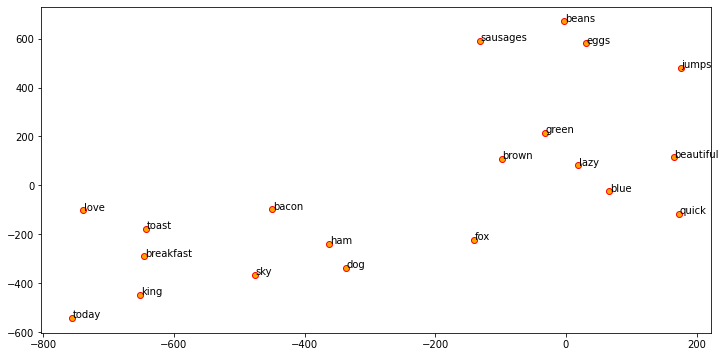

In [19]:
tsne = TSNE(n_components = 2,n_iter = 5000, random_state = 42, perplexity=5)
np.set_printoptions(suppress = True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize = (12,6))
plt.scatter(T[:,0],T[:,1], c= 'orange',edgecolors = 'r')
for label,x,y in zip(labels, T[:,0],T[:,1]):
  plt.annotate(label, xy=(x+1,y+1), xytext = (0,0), textcoords = 'offset points')

In [ ]:
#FastTEXT - 2016 - Facebook 

In [21]:
from gensim.models import FastText

tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_data]

#!!!!!!!!!!
#Skip-Gram: tries to predict the context via estimating the neighbours - Understands the neighbours or predicts the neighbours
#CBOW - Straighforward word - prediction based on neighbours  


#Setting values of params very important!!!
feature_size = 30 #word Vector dimensionality 
window_size = 20 #context window size
min_word_count= 1 #This a way to remove infrequent words
sg = 1 #1-CBOW


ft_model = FastText(tokenized_corpus, size= feature_size, window = window_size,min_count = min_word_count, sg = sg)
ft_model

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

#Visualize the Embeddings
from sklearn.manifold import TSNE

In [23]:
words = ft_model.wv.index2word
wvs = ft_model.wv[words]

tsne = TSNE(n_components = 2,n_iter = 5000, random_state = 42, perplexity=5)
np.set_printoptions(suppress = True)
T = tsne.fit_transform(wvs)
labels = words

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


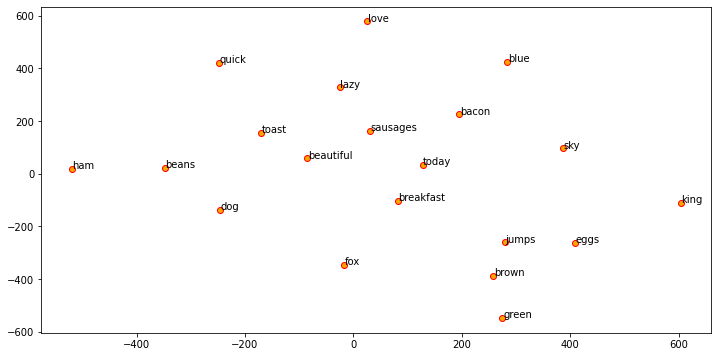

In [24]:
plt.figure(figsize = (12,6))
plt.scatter(T[:,0],T[:,1], c= 'orange',edgecolors = 'r')
for label,x,y in zip(labels, T[:,0],T[:,1]):
  plt.annotate(label, xy=(x+1,y+1), xytext = (0,0), textcoords = 'offset points')

In [30]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2022-04-24 05:28:48--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-04-24 05:28:48--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-04-24 05:28:48--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [34]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [38]:
import tensorflow as tf
from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential 
from keras.layers import Dense, Flatten
from keras.layers.embeddings import Embedding

In [31]:
doc = ['Good Job!',"Excellent Efforts",'Well Done!','nice work','Perfect!',
       'Bad!','Poor','Weak!','Very disappointed','Unsatisfactory']

In [33]:
labels = np.array([1,1,1,1,1,0,0,0,0,0])

In [39]:
t = Tokenizer()

In [42]:
t.fit_on_texts(doc)

In [43]:
vocab_size = len(t.word_index)+1

In [44]:
vocab_size

16

In [45]:
encoded = t.texts_to_sequences(doc)

In [46]:
encoded

[[1, 2], [3, 4], [5, 6], [7, 8], [9], [10], [11], [12], [13, 14], [15]]

In [47]:
max_length = 2
padded_documents = pad_sequences(encoded,maxlen = max_length, padding = 'post')

In [48]:
padded_documents

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9,  0],
       [10,  0],
       [11,  0],
       [12,  0],
       [13, 14],
       [15,  0]], dtype=int32)

In [52]:
f = open("glove.6B.100d.txt")
embeddings_index = dict()
for line in f: 
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype = 'float32')
  embeddings_index[word] = coefs
f.close()

In [57]:
embedding_matrix = np.zeros((vocab_size,100))

In [60]:
for word, i in t.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None: 
    embedding_matrix[i]= embedding_vector

In [68]:
model = Sequential()
e = Embedding(vocab_size,100,weights = [embedding_matrix], input_length=2,trainable = False)
model.add(e)
model.add(Flatten())
model.add(Dense(1,activation = 'sigmoid'))

In [69]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2, 100)            1600      
                                                                 
 flatten_1 (Flatten)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 1,801
Trainable params: 201
Non-trainable params: 1,600
_________________________________________________________________


In [71]:
model.fit(padded_documents,labels,epochs = 50,verbose = 1)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.8565 - accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 15ms/step - loss: 0.8429 - accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 13ms/step - loss: 0.8293 - accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 14ms/step - loss: 0.8159 - accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 13ms/step - loss: 0.8026 - accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 13ms/step - loss: 0.7894 - accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 13ms/step - loss: 0.7764 - accuracy: 0.5000
Epoch 8/50
1/1 [==============================] - 0s 13ms/step - loss: 0.7635 - accuracy: 0.5000
Epoch 9/50
1/1 [==============================] - 0s 15ms/step - loss: 0.7507 - accuracy: 0.5000
Epoch 10/50
1/1 [==============================] - 0s 13ms/step - loss: 0.7381 - accuracy: 0.5000
Epoch 11/50
1/1 [==============

In [73]:
loss, accuracy = model.evaluate(padded_documents, labels, verbose = 1)

1/1 [==============================] - 0s 348ms/step - loss: 0.3631 - accuracy: 0.9000


In [74]:
accuracy

0.8999999761581421

In [ ]:
#Try this?
text = "Worst!"
#Encode text - integers 
tokenizer.text_to_sequence()

#Pad 
pad_squence(2)

#Prediction 
model.predic_classes()

In [ ]:
Movie_reviews_sentiment